In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [7]:
df = pd.read_csv("../results/model_metrics.csv")

In [8]:
df["architecture"] = df["model"].str.extract(
    r"^(resnet50|densenet121|convnext_tiny)")

df["augmentation"] = df["model"].str.extract(
    r"(baseline|geo|mixed|photo)").fillna("baseline")
    
df["seed"] = df["model"].str.extract(r"seed(\d+)").astype(int)
df["group"] = df["architecture"] + "_" + df["augmentation"]

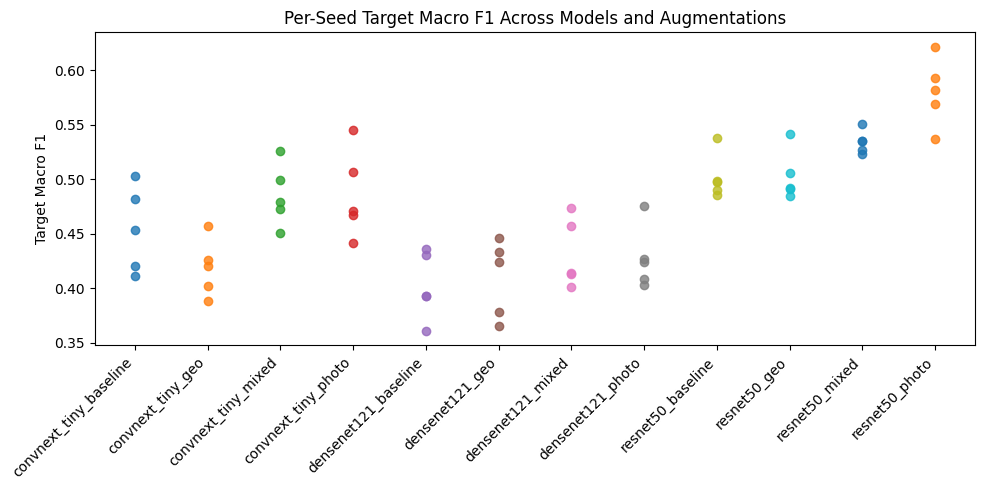

In [ ]:
groups = sorted(df["group"].unique())

plt.figure(figsize=(10, 5))

for i, g in enumerate(groups):
    subset = df[df["group"] == g]
    x = [i] * len(subset)
    plt.scatter(x, subset["target_macro_f1"], alpha=0.8)

plt.xticks(range(len(groups)), groups, rotation=45, ha="right")
plt.ylabel("Target Macro F1")
plt.title("Per-Seed Target Macro F1 Across Models and Augmentations")
plt.tight_layout()
plt.savefig("images/per_seed_target_macro_f1.png")
plt.show()

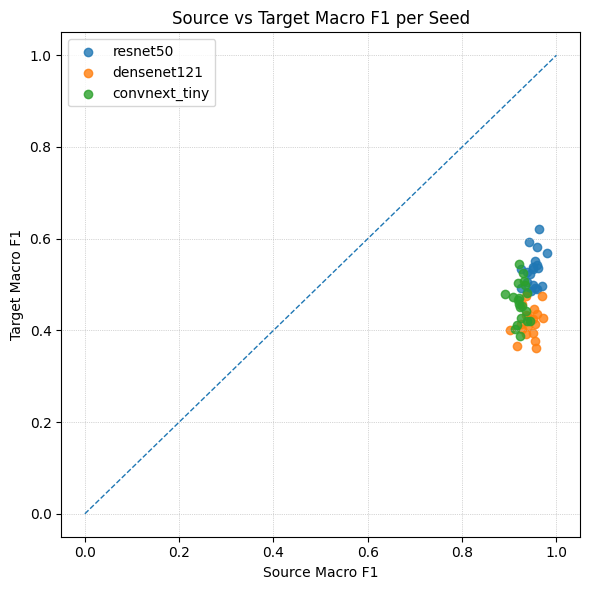

In [13]:
color_map = {
    "resnet50": "tab:blue",
    "densenet121": "tab:orange",
    "convnext_tiny": "tab:green",
}

plt.figure(figsize=(6, 6))

for arch, color in color_map.items():
    subset = df[df["architecture"] == arch]
    plt.scatter(
        subset["source_macro_f1"],
        subset["target_macro_f1"],
        label=arch,
        alpha=0.8,
        color=color
    )

# Reference diagonal
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)

plt.xlabel("Source Macro F1")
plt.ylabel("Target Macro F1")
plt.title("Source vs Target Macro F1 per Seed")
plt.legend()
plt.grid(True, linestyle=":", linewidth=0.5)
plt.tight_layout()
plt.show()

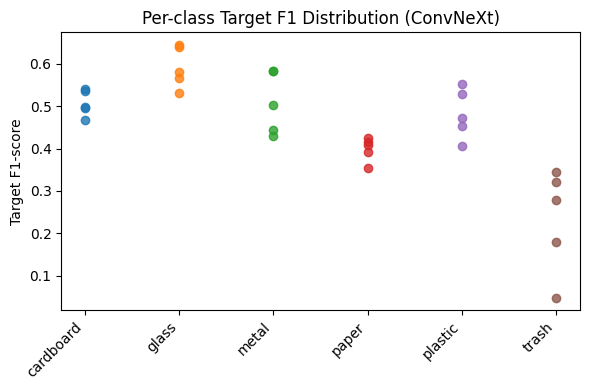

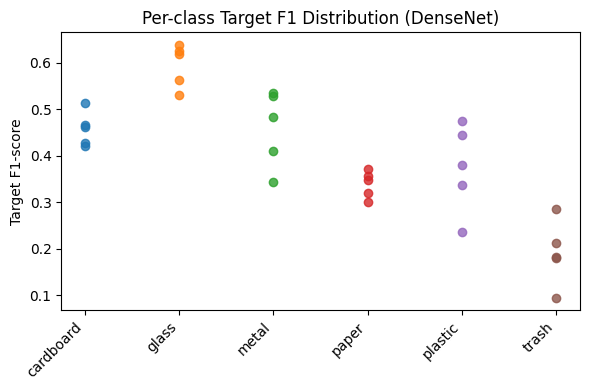

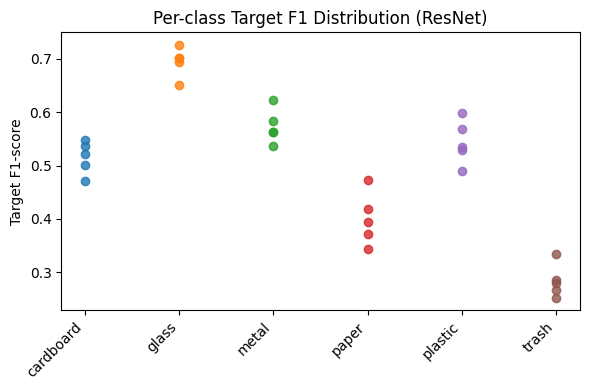

In [ ]:


df_class = pd.read_csv("../results/class_metrics.csv")

df_class = df_class[df_class["model"].str.contains("baseline")]

df_class["architecture"] = df_class["model"].str.extract(
    r"^(resnet50|densenet121|convnext_tiny)"
)

arch_map = {
    "resnet50": "ResNet",
    "densenet121": "DenseNet",
    "convnext_tiny": "ConvNeXt"
}
df_class["architecture"] = df_class["architecture"].map(arch_map)

classes = sorted(df_class["class"].unique())

for arch in df_class["architecture"].dropna().unique():
    sub = df_class[df_class["architecture"] == arch]

    plt.figure(figsize=(6, 4))

    for i, cls in enumerate(classes):
        vals = sub[sub["class"] == cls]["f1"]
        plt.scatter([i] * len(vals), vals, alpha=0.8)

    plt.xticks(range(len(classes)), classes, rotation=45, ha="right")
    plt.ylabel("Target F1-score")
    plt.title(f"Per-class Target F1 Distribution ({arch})")
    plt.tight_layout()
    plt.show()

In [31]:
df_sub = pd.read_csv("../results/subgroup_metrics.csv")

# Keep baseline only
df_sub = df_sub[df_sub["model"].str.contains("baseline")]

# Extract architecture
df_sub["architecture"] = df_sub["model"].str.extract(
    r"^(resnet50|densenet121|convnext_tiny)"
)

arch_map = {
    "resnet50": "ResNet",
    "densenet121": "DenseNet",
    "convnext_tiny": "ConvNeXt"
}
df_sub["architecture"] = df_sub["architecture"].map(arch_map)

# Extract factor type (background / lighting / view)
df_sub["factor"] = df_sub["subgroup"].str.split("_").str[0]

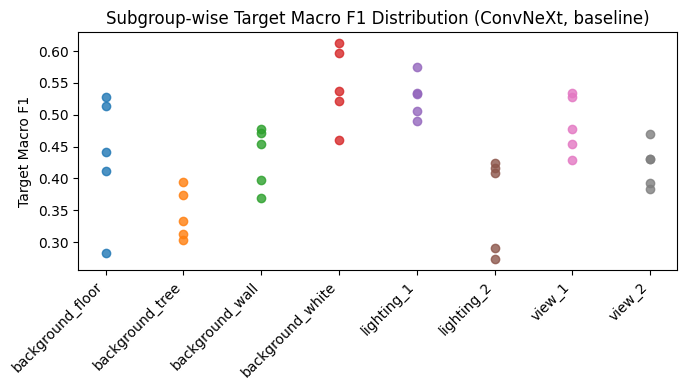

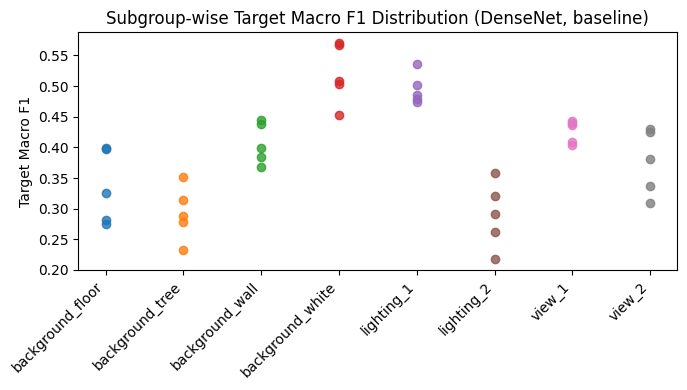

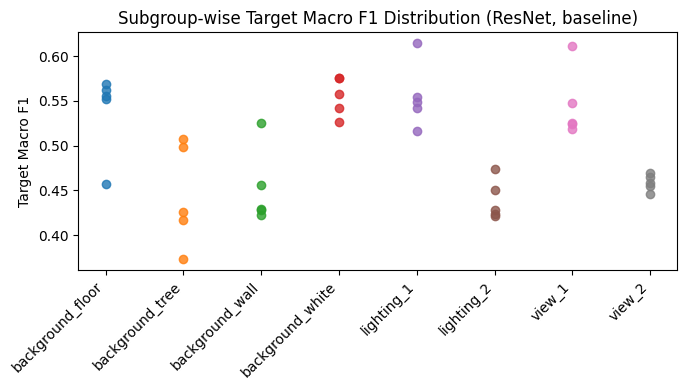

In [32]:
for arch in df_sub["architecture"].dropna().unique():
    sub = df_sub[df_sub["architecture"] == arch]

    subgroups = sorted(sub["subgroup"].unique())

    plt.figure(figsize=(7, 4))

    for i, sg in enumerate(subgroups):
        vals = sub[sub["subgroup"] == sg]["macro_f1"]
        plt.scatter([i] * len(vals), vals, alpha=0.8)

    plt.xticks(range(len(subgroups)), subgroups, rotation=45, ha="right")
    plt.ylabel("Target Macro F1")
    plt.title(f"Subgroup-wise Target Macro F1 Distribution ({arch}, baseline)")
    plt.tight_layout()
    plt.show()
